In [11]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt 

In [5]:
mf=pd.read_csv('homeprices.csv')

In [8]:
mf.head

<bound method NDFrame.head of    area   price
0  2800  580000
1  3600  595000
2  3800  625000
3  3900  685000
4  4100  720000>

In [9]:
mf.describe

<bound method NDFrame.describe of    area   price
0  2800  580000
1  3600  595000
2  3800  625000
3  3900  685000
4  4100  720000>

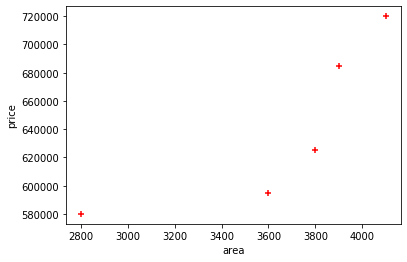

In [13]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(mf.area,mf.price,color='red',marker='+')

In [26]:
area=mf.drop('price',axis=1)


# area = mf.drop('price',axis='columns')
area

,area
0,2800
1,3600
2,3800
3,3900
4,4100


In [27]:
price=mf.price
price

0    580000
1    595000
2    625000
3    685000
4    720000
Name: price, dtype: int64

In [30]:
# Implement Linear Model
# Create linear regression object
model=linear_model.LinearRegression()
model.fit(area,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Pridecation of price for unknkone area

In [34]:
model.predict([[33000]])

array([3492865.61264822])

In [35]:
model.coef_

array([97.13438735])

In [36]:
model.intercept_

287430.83003952564

In [38]:
model.coef_
model.intercept_

287430.83003952564

### Y = m * X + b (m is coefficient and b is intercept)

In [41]:
price_pre=287430.83003952564+(33000*97.13438735)
price_pre

3492865.612589526

#### Create CSV file with the list of house price predication 

In [43]:
area_mf=pd.read_csv('areas.csv')
area_mf.head(3)

,areas
0,2000
1,2200
2,2600


In [45]:
pr=model.predict(area_mf)
pr

array([481699.60474308, 501126.48221344, 539980.23715415, 559407.11462451,
       598260.86956522, 599232.21343874, 604088.93280632, 607974.3083004 ])

In [46]:
area_mf['prices']=pr
area_mf

,areas,prices
0,2000,481699.604743
1,2200,501126.482213
2,2600,539980.237154
3,2800,559407.114625
4,3200,598260.869565
5,3210,599232.213439
6,3260,604088.932806
7,3300,607974.308300


In [47]:
area_mf.to_csv("price_prediction.csv")


### Exercise

Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020


### Save Model to a File Using Python Pickle

##### Pickle allows to arrange python object intio serial file 

In [64]:


import pickle 

In [65]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

### Load Saved Model

In [69]:
with open('model_pickle','rb') as f:
    os = pickle.load(f)

In [72]:


mp.predict([[5000]])



array([773102.76679842])

In [74]:
mp.coef_

array([97.13438735])

In [75]:
mp.intercept_

287430.83003952564

In [76]:
### Save Trained Model Using Joblib

In [77]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [78]:
joblib.dump(model, 'model_joblib')

['model_joblib']

In [79]:
### Load Saved Model

In [80]:
mj = joblib.load('model_joblib')

In [81]:
mj.coef_

array([97.13438735])

In [83]:
mj.intercept_

287430.83003952564

In [85]:
mj.predict([[5000]])

array([773102.76679842])

In [87]:
# joblib is more efficient on objects that carry large numpy arrays internally 

In [88]:
### https://github.com/codebasics/py/tree/master/ML/1_linear_reg